0.3e

Because there is some noise in the measured signal intensity at the routers, and the noise measured at the three routers for the same signal will be different, the three routers will all measure a distance that is slighly different from the actual distance. Now if we look at the theoretical case of three circels with one intersection point and we change the radius of one of the circles a little bit, we see that the three circles now have no common intersection point and 6 points where two circles intersect.

<img src="intersection.png">

In [2]:
%%latex

0.3f

We start with Friss free space equation as given in equation (1)

\begin{align*}
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi fr})\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) + log^{10}(\frac{1}{r}))\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) - log^{10}(r))\\
&\text{and (De Gua)}\\
r &= \sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}\\
&\text{so we get}\\
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 20*log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})\\
 &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 10*log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)
\end{align*}


<IPython.core.display.Latex object>

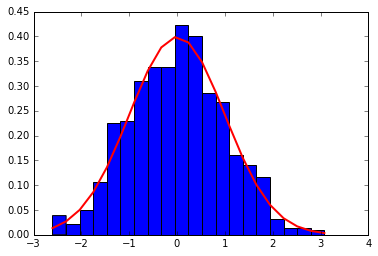

In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def friis_function():

    c = 299792458
    f = 2.4
    x_router = 0
    y_router = 0
    x_device = 20
    y_device = 0
    Z = 2
    p_t = 0
    r = math.sqrt((x_device-x_router)^2 + (y_device-y_router)^2 + Z^2)

    p_r = p_t + 20.0 * np.log10(c / (4.0 * np.pi * f * r))
    return p_r

#the mean and sigma used for creating the gaussian noise
mu = 0.0
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)


expected = friis_function()
measurements = [expected + noise1 for noise1 in package_noise]

normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.show()


Answer 0.3G
The mean of the distribution is 0 and the standard deviation is 1...

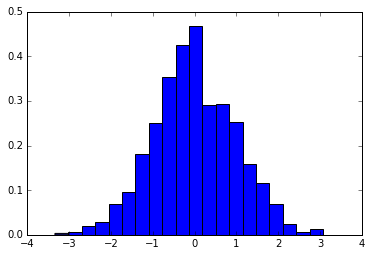

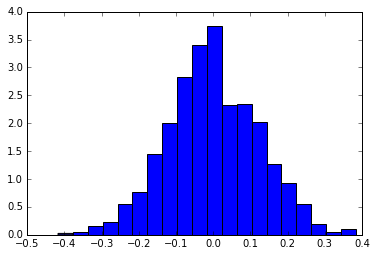

In [4]:
mu = 0.0
sigma = 2.0

package_noise = np.random.normal(mu, sigma, 1000)

normalized_residuals = [(measurement - expected)/1 for measurement in measurements]

#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

mu = 0.0
sigma = 2.0

package_noise = np.random.normal(mu, sigma, 1000)

normalized_residuals = [(measurement - expected)/8 for measurement in measurements]

count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

0.3 h) If we underestimate the noise, the standard deviation of the pull distribution becomes larger, showing values way above 1 
(meaning much noise). If we overestimate the noise, the standard deviation becomes small showing values lower than 1, which would mean that there is no noise (while there actually is noise). 




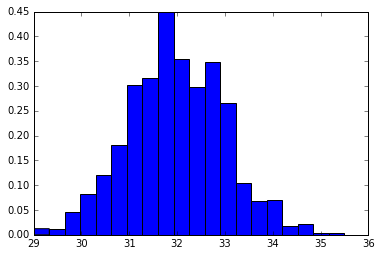

In [6]:
def friis_function(const):

    c = 299792458
    f = 2.4
    x_router = 0
    y_router = 0
    x_device = 20
    y_device = 0
    Z = 2
    p_t = 0
    r = math.sqrt((x_device-x_router)^2 + (y_device-y_router)^2 + Z^2)

    p_r = p_t + const * np.log10(c / (4.0 * np.pi * f * r))
    return p_r

#the mean and sigma used for creating the gaussian noise
mu = 0.0
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)


expected = friis_function(20.0)
measure_friis = friis_function(25.0)
measurements = [measure_friis + noise1 for noise1 in package_noise]

normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

In [7]:
%%latex

0.3 i) The mean shifts in the positive direction. The amount of shift is determined by:

\begin{align*}
S_i &= P_t + 20*log^{10}(\frac{c}{4\pi fr}) + noise\\
P_r &= P_t + 25*log^{10}(\frac{c}{4\pi fr})\\
Shift &= S_i - P_r - noise \\
&= 20*log^{10}(\frac{c}{4\pi fr})- 25*log^{10}(\frac{c}{4\pi fr})
\end{align*}

<IPython.core.display.Latex object>

In [8]:
%%latex

0.3 j) What you want to see in a pull distribution is a spread over 4 sigmas and a centration on the 0, which means the mean is at the 0 point. 

<IPython.core.display.Latex object>